In [6]:
import pandas as pd

file_path = r"D:\Projects\Guvi_DA_task\sample_data.csv"
df = pd.read_csv(file_path)

df_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "null_values": df.isnull().sum().to_dict(),
    "dtypes": df.dtypes.astype(str).to_dict(),
    "head": df.head().to_dict()
}

df_info


{'shape': (9514, 11),
 'columns': ['User ID',
  'Product Code',
  'Payment Status',
  'Coupon code',
  'Lead Registered Time',
  'Sales Date',
  'Source',
  'Product Amount with GST',
  'Payment Mode',
  'Currency  Code',
  'Transaction Bank'],
 'null_values': {'User ID': 0,
  'Product Code': 0,
  'Payment Status': 0,
  'Coupon code': 8852,
  'Lead Registered Time': 0,
  'Sales Date': 0,
  'Source': 0,
  'Product Amount with GST': 1,
  'Payment Mode': 7784,
  'Currency  Code': 0,
  'Transaction Bank': 9422},
 'dtypes': {'User ID': 'object',
  'Product Code': 'object',
  'Payment Status': 'object',
  'Coupon code': 'object',
  'Lead Registered Time': 'object',
  'Sales Date': 'object',
  'Source': 'object',
  'Product Amount with GST': 'float64',
  'Payment Mode': 'object',
  'Currency  Code': 'object',
  'Transaction Bank': 'object'},
 'head': {'User ID': {0: 'user1',
   1: 'user2',
   2: 'user4',
   3: 'user6',
   4: 'user8'},
  'Product Code': {0: 'Product1',
   1: 'Product2',
   2: 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from openpyxl import Workbook
from openpyxl.drawing.image import Image as XLImage
import os

data = df.copy()

1. Data cleaning 

In [15]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]


date_col = "sales_date"
product_col = "product_code"
sales_col = "product_amount_with_gst"
customer_col = "user_id"


df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
df[sales_col] = pd.to_numeric(df[sales_col], errors="coerce")

2. Analysis the patterns in data

In [16]:
total_sales = df[sales_col].sum()
unique_products = df[product_col].nunique()
unique_customers = df[customer_col].nunique()

In [17]:
monthly_sales = (
    df.groupby(df[date_col].dt.to_period("M"))[sales_col]
    .sum()
    .reset_index()
)
monthly_sales[date_col] = monthly_sales[date_col].astype(str)


top_products = (
    df.groupby(product_col)[sales_col]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

3.Visualizing the patterns that are found 

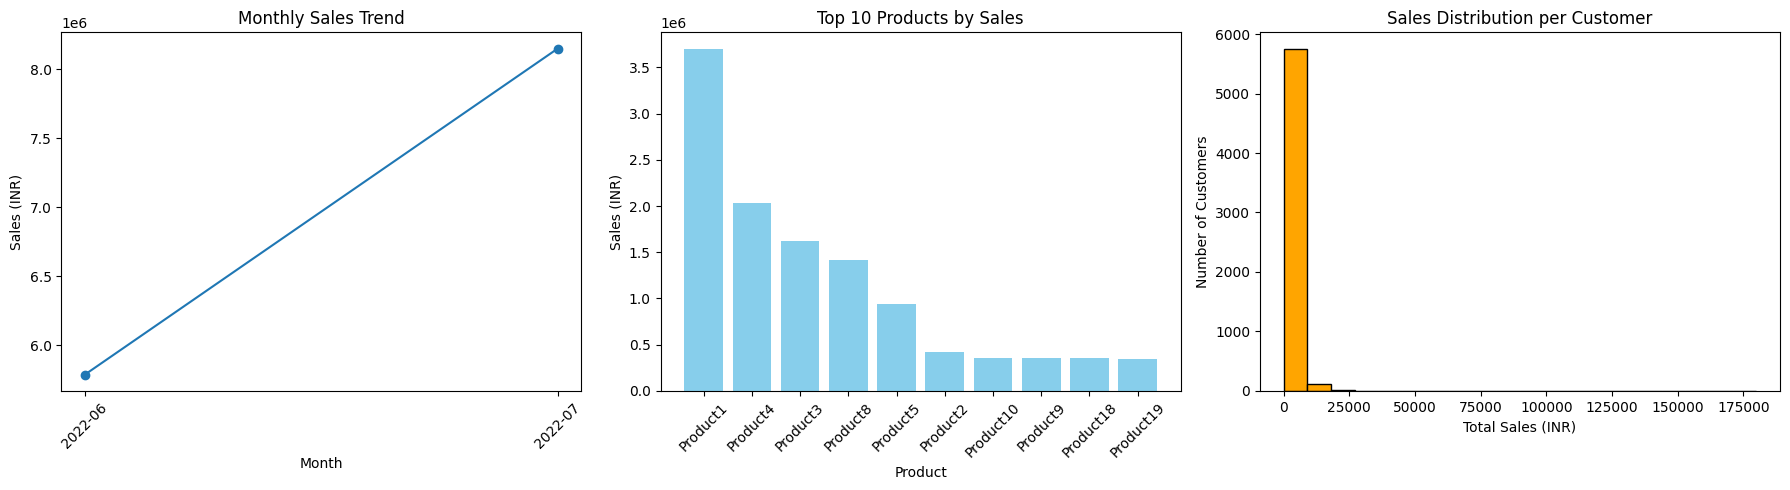

 Analysis Sales Report
 Total Sales: ₹13,936,378.84
 Unique Products: 141
 Unique Customers: 5885

 Insights:
- Sales trend over months highlights seasonality and growth/decline patterns.
- Top products identified for revenue contribution.
- Customer distribution shows sales concentration (few big buyers vs. many small).


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

axes[0].plot(monthly_sales[date_col], monthly_sales[sales_col], marker="o")
axes[0].set_title("Monthly Sales Trend")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Sales (INR)")
axes[0].tick_params(axis="x", rotation=45)

axes[1].bar(top_products[product_col], top_products[sales_col], color="skyblue")
axes[1].set_title("Top 10 Products by Sales")
axes[1].set_xlabel("Product")
axes[1].set_ylabel("Sales (INR)")
axes[1].tick_params(axis="x", rotation=45)

sales_per_customer = df.groupby(customer_col)[sales_col].sum()
axes[2].hist(sales_per_customer, bins=20, color="orange", edgecolor="black")
axes[2].set_title("Sales Distribution per Customer")
axes[2].set_xlabel("Total Sales (INR)")
axes[2].set_ylabel("Number of Customers")

plt.tight_layout()
plt.show()

print(" Analysis Sales Report")
print(f" Total Sales: ₹{total_sales:,.2f}")
print(f" Unique Products: {unique_products}")
print(f" Unique Customers: {unique_customers}")
print("\n Insights:")
print("- Sales trend over months highlights seasonality and growth/decline patterns.")
print("- Top products identified for revenue contribution.")
print("- Customer distribution shows sales concentration (few big buyers vs. many small).")
